# Crab Measurements

<img src = '../images/Measurement-of-width-and-length-of-crab-Source-FAO.png' alt = 'https://www.researchgate.net/figure/Measurement-of-width-and-length-of-crab-Source-FAO_fig2_316495313'>


## Data Dictionary

| Column Name      | Data Type   | Description                                                |
|------------------|-------------|------------------------------------------------------------|
| id               | integer     | The identification number of the crab species              |
| Sex              | Categorical | M for Male; F for Female; I for Infant                     |
| Length           | float       | Measured from the front (eye) carapace to the tail         |
| Diameter         | float       | Measured from one side of the carapace to the other        |
| Height           | float       | Measured from the base of the body to the top              |
| Weight           | float       | The overall weight of the crab                             |
| Shucked Weight   | float       | The weight of 'meat'                                       |
| Viscera Weight   | float       | The weight of the internal organs                          |
| Shell Weight     | float       | The weight of the shell                                    |
| Age              | integer     | The target variable and the age of the crab                |


In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# set plot theme
plt.style.use('ggplot')

# set dataframe display 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

In [12]:
# import training data
train_raw = pd.read_csv('../data/train.csv')

print(train_raw.head()) # initial inspect of train df
print(train_raw.dtypes) # check datatypes

   id Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  Shell Weight  Age
0   0   I  1.5250    1.1750  0.3750  28.973189       12.728926        6.647958      8.348928    9
1   1   I  1.1000    0.8250  0.2750  10.418441        4.521745        2.324659      3.401940    8
2   2   M  1.3875    1.1125  0.3750  24.777463       11.339800        5.556502      6.662133    9
3   3   F  1.7000    1.4125  0.5000  50.660556       20.354941       10.991839     14.996885   11
4   4   I  1.2500    1.0125  0.3375  23.289114       11.977664        4.507570      5.953395    8
id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object


In [13]:
# import test data
test_raw = pd.read_csv('../data/test.csv')

print(test_raw.head()) # initial inspection of test df
print(test_raw.dtypes) # check datatypes for each variable

      id Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  Shell Weight
0  74051   I  1.0500    0.7625  0.2750   8.618248        3.657085        1.729319      2.721552
1  74052   I  1.1625    0.8875  0.2750  15.507176        7.030676        3.246018      3.968930
2  74053   F  1.2875    0.9875  0.3250  14.571643        5.556502        3.883882      4.819415
3  74054   F  1.5500    0.9875  0.3875  28.377849       13.380964        6.548735      7.030676
4  74055   I  1.1125    0.8500  0.2625  11.765042        5.528153        2.466407      3.331066
id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
dtype: object


In [15]:
# Maintain consistency between columns


def clean_headers(some_dataframe: pd.DataFrame):

    '''
    This function aims to clean a dataframe's column header by: 

    Lower case all text in the column headers
    Remove trailing and leading white spaces
    Replace the spaces between words with underscore
    
    
    '''

    some_dataframe.columns = some_dataframe.columns.str.lower() # lower case the headers
    some_dataframe.columns = some_dataframe.columns.str.strip() # remove whitespace from front and rear
    some_dataframe.columns = some_dataframe.columns.str.replace(' ', '_') # insert underscore between words

    return some_dataframe




In [16]:
# clean both the train and test dataset

train_df = clean_headers(train_raw)
test_df = clean_headers(test_raw)

print(train_df.head(2)) # inspect if column headers for train df are cleaned
print()
print(test_df.head(2)) # inspect if column headers for test df are cleaned

   id sex  length  diameter  height     weight  shucked_weight  viscera_weight  shell_weight  age
0   0   I   1.525     1.175   0.375  28.973189       12.728926        6.647958      8.348928    9
1   1   I   1.100     0.825   0.275  10.418441        4.521745        2.324659      3.401940    8

      id sex  length  diameter  height     weight  shucked_weight  viscera_weight  shell_weight
0  74051   I  1.0500    0.7625   0.275   8.618248        3.657085        1.729319      2.721552
1  74052   I  1.1625    0.8875   0.275  15.507176        7.030676        3.246018      3.968930


## Exploratory Data Analysis

We will only focus on the training dataset for EDA.

In [17]:
# basic statistical summary
print(train_df.describe())

                 id        length      diameter        height        weight  shucked_weight  viscera_weight  shell_weight           age
count  74051.000000  74051.000000  74051.000000  74051.000000  74051.000000    74051.000000    74051.000000  74051.000000  74051.000000
mean   37025.000000      1.317460      1.024496      0.348089     23.385217       10.104270        5.058386      6.723870      9.967806
std    21376.826729      0.287757      0.237396      0.092034     12.648153        5.618025        2.792729      3.584372      3.175189
min        0.000000      0.187500      0.137500      0.000000      0.056699        0.028349        0.042524      0.042524      1.000000
25%    18512.500000      1.150000      0.887500      0.300000     13.437663        5.712424        2.863300      3.968930      8.000000
50%    37025.000000      1.375000      1.075000      0.362500     23.799405        9.908150        4.989512      6.931453     10.000000
75%    55537.500000      1.537500      1.200000 

It is important to note that the units for measurements are unknown and only age is assumed to be values in years. 

Based on the initial statistical table, we can see that the values for length and diameter do not differ largely from the mean. However, there is a large difference between the average height and weight and the 75%, maximum values for those variables. Those could be possible outliers and will need to be analysed closer. Similarly, The values of weight do vary widely between the average and the higher quantiles. 

We see that the minimum age for the crab is 1 years old, and the oldest sample was found to be 29 years.

In [18]:
# check for null values
print(train_df.isna().sum()) # no null values found

id                0
sex               0
length            0
diameter          0
height            0
weight            0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

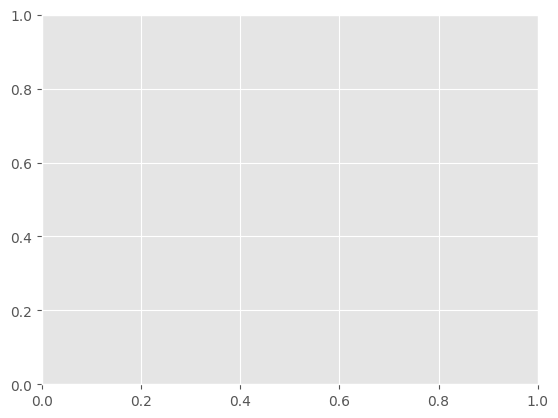

In [26]:
# plot a box plot to look at possible outliers

plt.boxplot(x = train_df, vert=False)




plt.show()